Mean Squared Error: 5211523.05
Predicted electricity demand: 16231.38 units


C:\Users\Durga Reddy\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


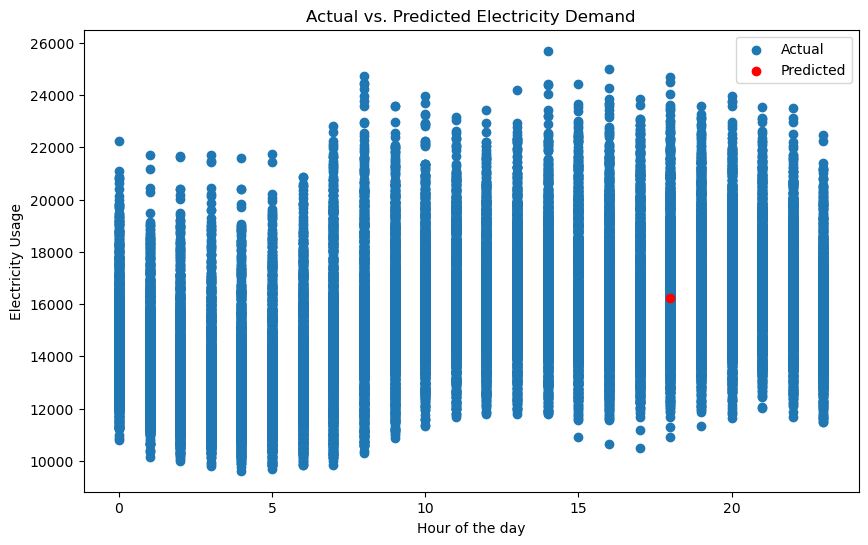

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data (you'll replace this with real data)
# Assume we have a dataset with columns: 'timestamp', 'electricity_usage'
#timestamps = pd.date_range(start='2023-01-01', periods=365, freq='D')
#electricity_usage = np.random.randint(low=100, high=1000, size=len(timestamps))

# Create a DataFrame
#df = pd.DataFrame({'timestamp': timestamps, 'electricity_usage': electricity_usage})
df = pd.read_csv('AEP_hourly.csv')
# Extract features (e.g., hour of the day, day of the week, etc.)
df["Datetime"]=pd.to_datetime(df["Datetime"])
df['hour'] = df['Datetime'].dt.hour
df['day_of_week'] = df['Datetime'].dt.dayofweek

# Split data into training and testing sets
X = df[['hour', 'day_of_week']]
y = df['AEP_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Predict future electricity demand
future_hour = 18  # Example: predicting demand at 6:00 PM
future_day_of_week = 4  # Example: predicting demand on Friday
future_demand = model.predict([[future_hour, future_day_of_week]])
print(f"Predicted electricity demand: {future_demand[0]:.2f} units")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test['hour'], y_test, label='Actual')
plt.scatter(future_hour, future_demand, color='red', marker='o', label='Predicted')
plt.xlabel('Hour of the day')
plt.ylabel('Electricity Usage')
plt.title('Actual vs. Predicted Electricity Demand')
plt.legend()
plt.show()